# Monte Carlo Simulation for Prediction

### What is Monte Carlo Simulation?  
Monte Carlo Simulation is a statistical technique used to model uncertainty and predict future outcomes by running numerous simulations based on random variables. Instead of relying on a single estimate, it generates multiple possible scenarios using probability distributions.  

### Why is it useful for our stock analysis?  
✅ **Stock Price Forecasting:** Simulates thousands of potential price movements to estimate future trends.  
✅ **Risk Assessment:** Evaluates the probability of extreme market fluctuations and potential investment risks.  
✅ **Portfolio Optimization:** Helps identify expected returns and downside risks for better decision-making.  
✅ **Improved Predictions:** Provides a probabilistic view of stock performance, making forecasts more reliable.  

By using Monte Carlo Simulation, we can enhance our stock price analysis with a more realistic understanding of market volatility and investment risks.  

In [23]:
df

,stock_ticker,date,close_price,high_price,low_price,open_price,volume,SMA_50,SMA_100,SMA_500,EMA_50,EMA_100,EMA_500,daily_return
0,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000,NaN,NaN,NaN,80.279427,80.279427,80.279427,NaN
1,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500,NaN,NaN,NaN,80.276924,80.278163,80.279172,-0.000795
2,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000,NaN,NaN,NaN,80.269199,80.274237,80.278376,-0.001691
3,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400,NaN,NaN,NaN,80.284622,80.281926,80.279910,0.007275
4,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900,NaN,NaN,NaN,80.311019,80.295308,80.282616,0.003660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,RY.TO,2024-12-23,173.449997,173.869995,172.610001,173.000000,3932200,173.565855,166.640144,133.768959,172.685196,166.622144,139.333638,0.000288
6269,RY.TO,2024-12-24,173.529999,173.740005,173.050003,173.529999,610300,173.633966,166.864230,133.878564,172.718326,166.758934,139.470150,0.000461
6270,RY.TO,2024-12-27,174.360001,174.500000,173.440002,173.440002,1846800,173.682180,167.130436,133.992339,172.782705,166.909450,139.609431,0.004783
6271,RY.TO,2024-12-30,173.059998,173.589996,172.289993,173.000000,3103600,173.680788,167.393660,134.102167,172.793579,167.031243,139.742966,-0.007456


In [24]:
# Load your dataframe (assuming it's named df)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Select a stock (Example: BMO.TO)
stock = 'BMO.TO'
df_stock = df[df['stock_ticker'] == stock].copy()

# Sort by date
df_stock = df_stock.sort_index()

# Calculate daily returns
df_stock['daily_return'] = df_stock['close_price'].pct_change()
df_stock.dropna(inplace=True)

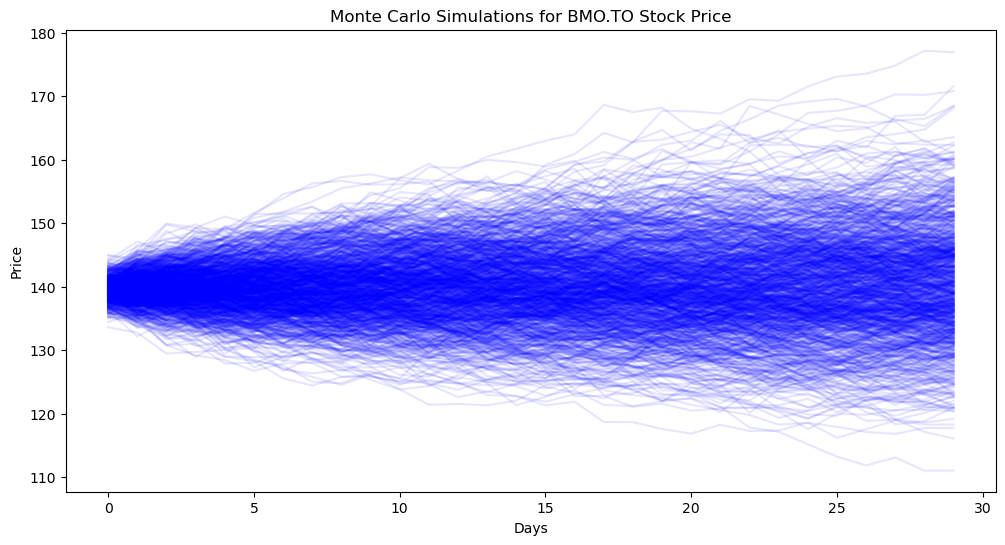

In [25]:
# Simulation Parameters
num_simulations = 1000  # Number of simulated price paths
num_days = 30  # Forecasting horizon

# Extract key statistics
last_price = df_stock['close_price'].iloc[-1]
mu = df_stock['daily_return'].mean()
sigma = df_stock['daily_return'].std()

# Generate Monte Carlo simulations
simulations = np.zeros((num_days, num_simulations))

for i in range(num_simulations):
    price_series = [last_price]
    for _ in range(num_days):
        price_series.append(price_series[-1] * (1 + np.random.normal(mu, sigma)))
    simulations[:, i] = price_series[1:]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(simulations, alpha=0.1, color='blue')
plt.title(f'Monte Carlo Simulations for {stock} Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

Expected Price (Mean): 140.63
5th Percentile (Worst Case): 126.37
95th Percentile (Best Case): 155.74


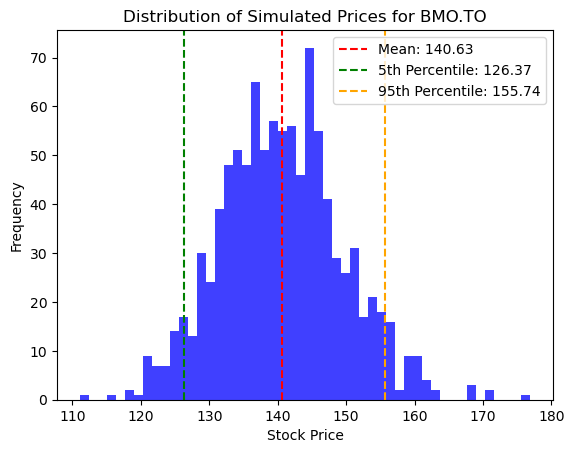

In [26]:
#Analyze Results

# Extract final prices from simulations
final_prices = simulations[-1, :]

# Compute statistics
mean_price = np.mean(final_prices)
percentile_5 = np.percentile(final_prices, 5)  # Worst case
percentile_95 = np.percentile(final_prices, 95)  # Best case

print(f"Expected Price (Mean): {mean_price:.2f}")
print(f"5th Percentile (Worst Case): {percentile_5:.2f}")
print(f"95th Percentile (Best Case): {percentile_95:.2f}")

# Histogram
plt.hist(final_prices, bins=50, alpha=0.75, color='blue')
plt.axvline(mean_price, color='r', linestyle='dashed', label=f'Mean: {mean_price:.2f}')
plt.axvline(percentile_5, color='g', linestyle='dashed', label=f'5th Percentile: {percentile_5:.2f}')
plt.axvline(percentile_95, color='orange', linestyle='dashed', label=f'95th Percentile: {percentile_95:.2f}')
plt.title(f'Distribution of Simulated Prices for {stock}')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Monte Carlo Simulation: BMO Stock Price Prediction  

This chart represents a **Monte Carlo simulation** for predicting the future stock price of **BMO (Bank of Montreal)** based on thousands of possible price movements.  

###  Key Elements of the Chart  

 **Blue Histogram:**  
- Displays the distribution of simulated stock prices.  
- The **x-axis** represents different stock price values.  
- The **y-axis** shows how frequently each price occurs in the simulations.  

 **Dashed Lines:**  
- **🟥 Red Line (Mean Price: 140.63):** The **average** predicted price.  
- **🟩 Green Line (5th Percentile: 126.37):** Represents a **worst-case scenario**—5% of simulations predict a price below this value.  
- **🟧 Orange Line (95th Percentile: 155.74):** Represents a **best-case scenario**—95% of simulations predict a price below this value.  

###  What This Means  
This simulation helps estimate the possible future price of BMO stock and assess **risk and uncertainty**:  
- ** Risk-averse investors** may focus on the **worst-case scenario (126.37)** to minimize losses.  
- ** Growth-seeking investors** might look at the **best-case scenario (155.74)** for potential gains.  
- ** The average price (140.63)** offers a balanced expectation.  

Monte Carlo simulations provide **data-driven insights**, helping investors make more informed financial decisions


**Automate for All Banks**

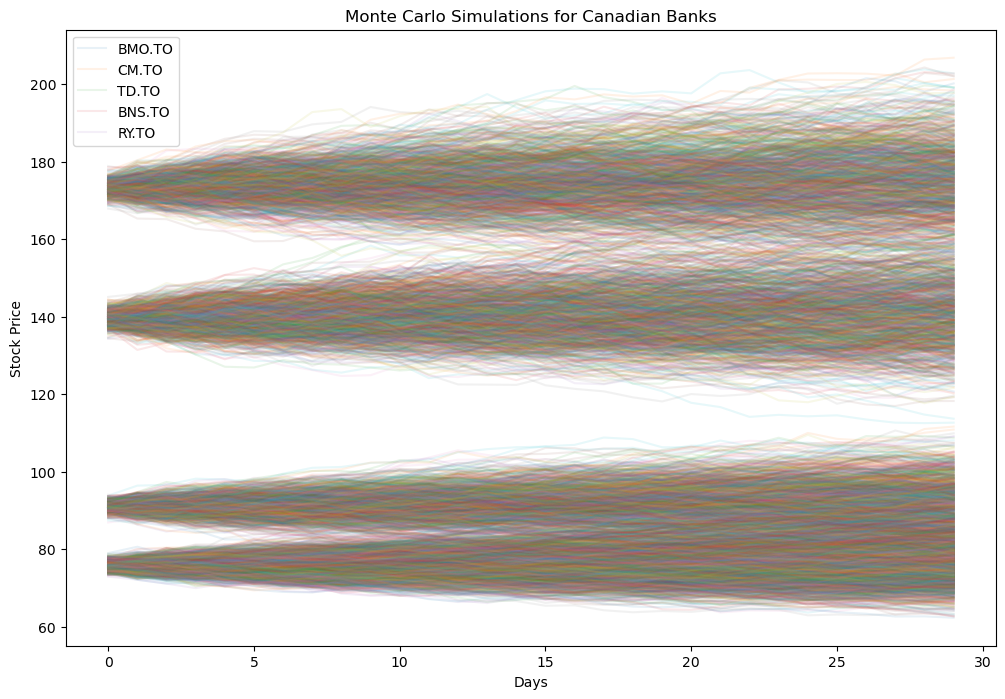


🔹 Monte Carlo Simulation Results 🔹

              Mean  5% (Worst Case)  95% (Best Case)
BMO.TO  140.941106       126.813601       156.084502
CM.TO    92.628207        82.958676       102.676923
TD.TO    75.293199        68.108973        83.224713
BNS.TO   76.670756        69.378323        84.756724
RY.TO   175.911182       161.424729       192.033513


In [27]:
# List of banks
banks = df['stock_ticker'].unique()
num_simulations = 1000  # Number of Monte Carlo paths
num_days = 30  # Forecasting horizon

# Store results
summary = {}

# Monte Carlo Simulation for each bank
plt.figure(figsize=(12, 8))

for bank in banks:
    df_stock = df[df['stock_ticker'] == bank].copy().sort_index()
    df_stock['daily_return'] = df_stock['close_price'].pct_change()
    df_stock.dropna(inplace=True)

    # Extract parameters
    last_price = df_stock['close_price'].iloc[-1]
    mu = df_stock['daily_return'].mean()
    sigma = df_stock['daily_return'].std()

    # Monte Carlo simulation
    simulations = np.zeros((num_days, num_simulations))

    for i in range(num_simulations):
        price_series = [last_price]
        for _ in range(num_days):
            price_series.append(price_series[-1] * (1 + np.random.normal(mu, sigma)))
        simulations[:, i] = price_series[1:]

    # Calculate final price statistics
    final_prices = simulations[-1, :]
    mean_price = np.mean(final_prices)
    percentile_5 = np.percentile(final_prices, 5)  # Worst case
    percentile_95 = np.percentile(final_prices, 95)  # Best case

    # Store results
    summary[bank] = {'Mean': mean_price, '5% (Worst Case)': percentile_5, '95% (Best Case)': percentile_95}

    # Plot results
    plt.plot(simulations, alpha=0.1, label=bank)

plt.title('Monte Carlo Simulations for Canadian Banks')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend(banks, loc='upper left')
plt.show()

# Convert summary to DataFrame
summary_df = pd.DataFrame(summary).T
print("\n🔹 Monte Carlo Simulation Results 🔹\n")
print(summary_df)

### Conclusion on Monte Carlo Simulation for Canadian Banks
This Monte Carlo simulation models the potential future stock prices of five major Canadian banks (BMO.TO, CM.TO, TD.TO, BNS.TO, and RY.TO) over a 30-day period. The simulation runs multiple trials, creating a range of possible outcomes for each stock.

**Key Takeaways:**
**Stock Price Uncertainty:**

- The simulation shows a wide spread of possible stock prices, indicating uncertainty in future price movements.
- More variation (wider spread) suggests higher volatility.

**Mean, Best-Case, and Worst-Case Scenarios:**

- BMO.TO and RY.TO have the highest mean projected prices (140.94 and 175.01, respectively), indicating stronger expected performance.
- CM.TO, TD.TO, and BNS.TO have lower mean projected prices, suggesting relatively weaker expected growth.
- The 5% worst-case scenario values show the lowest expected price in a bad market condition, while the 95% best-case scenario values represent a potential upside in a strong market.

**Risk Assessment:**

- RY.TO has the highest upside potential but also exhibits wider price fluctuations, indicating higher risk.
- TD.TO and BNS.TO have relatively lower expected price ranges, suggesting more stability but limited upside.

**Investment Implications:**

- Conservative investors may prefer TD.TO or BNS.TO for lower volatility.
- Risk-tolerant investors could consider RY.TO or BMO.TO for potential higher returns, but they must be prepared for significant price swings.
- Portfolio diversification within the banking sector may still carry risk due to high correlation among these stocks.

**Conclusion:**
Monte Carlo simulations https://www.investopedia.com/terms/m/montecarlosimulation.asp provide a probabilistic view of future prices, helping investors make informed decisions based on risk tolerance and expected returns. However, real-world factors like economic policies, interest rates, and market sentiment can influence outcomes beyond simulated projections.